In [1]:
# # Diabetes Prediction using Logistic Regression
# 1. Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 2. Define Paths and Create Directory

import os

# Define paths
dataset_path = '/content/drive/MyDrive/ML_DEPI_Diabities_Dataset/diabetes.csv'
model_dir = '/content/drive/MyDrive/ML_DEPI_Diabities_Dataset/models/'

# Create directories if they don't exist
os.makedirs(model_dir, exist_ok=True)
print(f'Model directory created at: {model_dir}')

Model directory created at: /content/drive/MyDrive/ML_DEPI_Diabities_Dataset/models/


In [3]:
# 3. Import Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline # Import Pipeline
import joblib

In [4]:
# 4. Data Loading & Preprocessing

# Load dataset
df = pd.read_csv(dataset_path)

# Data cleaning function (handles zero values)
def clean_data(df):
    # Handle zeros in physiologically impossible columns
    df['Glucose'] = df['Glucose'].replace(0, int(df['Glucose'].mean()))
    df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
    df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
    df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
    df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
    return df

df = clean_data(df)

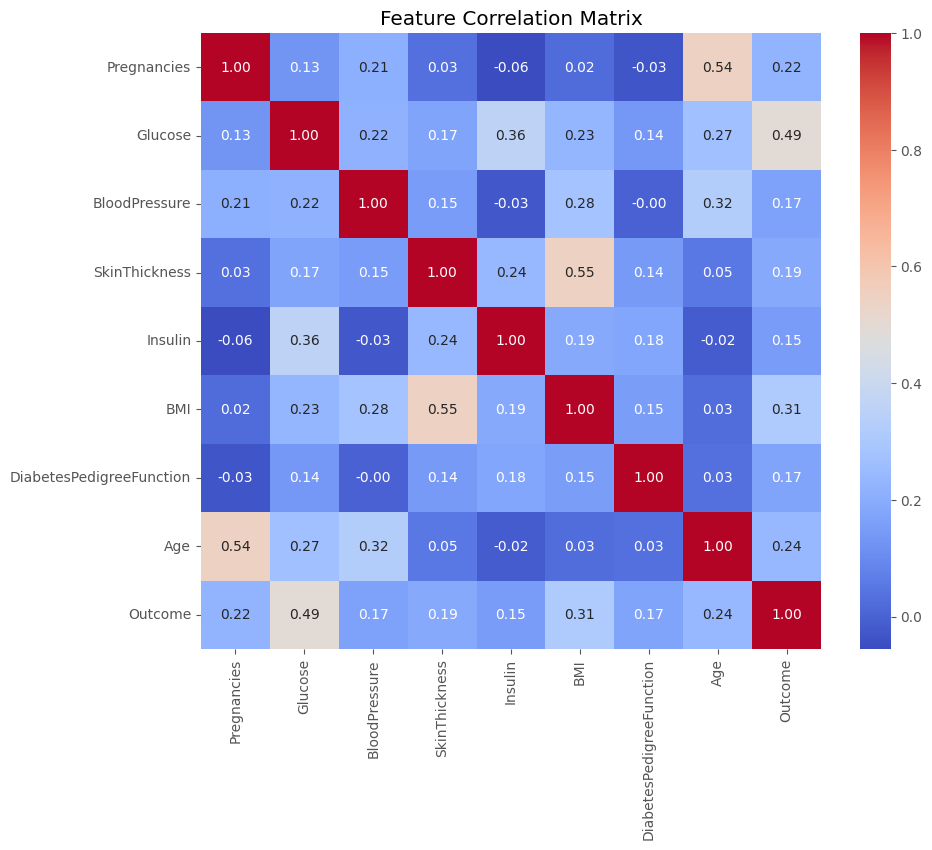

In [5]:
# 5. Data Visualization

# Set up visualization style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Correlation matrix
def plot_correlation(dataframe):
    corr = dataframe.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Feature Correlation Matrix')
    plt.show()

plot_correlation(df)

# You can add other visualization cells here as desired

In [6]:
# 6. Prepare Data for Modeling

# Define features (X) and target (y)
# Keep all columns except 'Outcome' for prediction features initially
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Train-test split using original data (scaling will be done in pipeline)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.12,
    random_state=42 # Use a random state for reproducibility
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")



Training data shape: (675, 8)
Testing data shape: (93, 8)


In [7]:
# 7. Build and Train the Pipeline

# Create the preprocessing steps and the model
# The pipeline will perform these steps in order
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Step 1: Standardize features
    ('logreg', LogisticRegression()) # Step 2: Train Logistic Regression model
])

# Train the pipeline on the training data
# The pipeline automatically fits the scaler and then the model
pipeline.fit(X_train, y_train)

print("Pipeline training complete.")

Pipeline training complete.


Pipeline Evaluation Metrics:
Accuracy: 0.75
Precision: 0.65
Recall: 0.62
F1 Score: 0.63
\nConfusion Matrix:
[[50 11]
 [12 20]]


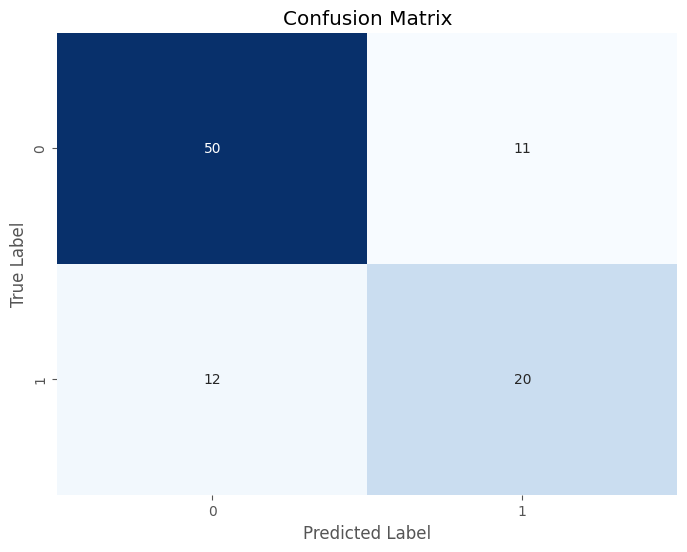

In [8]:
# 8. Evaluate the Pipeline

def evaluate_pipeline(pipeline, X_test, y_test):
    # Predict using the pipeline (it automatically scales X_test first)
    y_pred = pipeline.predict(X_test)

    print("Pipeline Evaluation Metrics:")
    print("="*40)
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {metrics.precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {metrics.recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {metrics.f1_score(y_test, y_pred):.2f}")
    print("\\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

evaluate_pipeline(pipeline, X_test, y_test)

In [9]:
# 9. Save the Pipeline

# %%
# Define the path to save the pipeline
pipeline_path = os.path.join(model_dir, 'diabetes_pipeline.pkl')

# Save the entire pipeline
joblib.dump(pipeline, pipeline_path)

print(f"Pipeline saved to: {pipeline_path}")

Pipeline saved to: /content/drive/MyDrive/ML_DEPI_Diabities_Dataset/models/diabetes_pipeline.pkl


In [10]:
# 10. Load and Test the Pipeline (One Input Path)

# Load the saved pipeline
loaded_pipeline = joblib.load(pipeline_path)

print("Pipeline loaded successfully.")

# Example of a new data point (replace with actual raw values you want to test)
# The order of features must match the columns in X used for training
# These are the raw values before any scaling
# Columns used for training were all except 'Outcome':
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
sample_raw_input_data = [[6, 148, 72, 35, 30.5, 33.6, 0.627, 50]] # Example from df.head(1)

# Convert the sample input to a pandas DataFrame (recommended for consistency)
sample_df = pd.DataFrame(sample_raw_input_data, columns=X_train.columns)


print("Raw Sample Input:")
print(sample_df)

# Make a prediction using the loaded pipeline
# The pipeline automatically scales this raw input before prediction
prediction = loaded_pipeline.predict(sample_df)

print("\\nPrediction Result:")
if prediction[0] == 0:
    print("Predicted Outcome: 0 (No Diabetes)")
else:
    print("Predicted Outcome: 1 (Diabetes)")

# You can also get probability estimates from the pipeline
prediction_proba = loaded_pipeline.predict_proba(sample_df)
print("Prediction Probabilities (Class 0, Class 1):", prediction_proba)


Pipeline loaded successfully.
Raw Sample Input:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
\nPrediction Result:
Predicted Outcome: 1 (Diabetes)
Prediction Probabilities (Class 0, Class 1): [[0.23773548 0.76226452]]
